# Generate Start Data

In the absense of having data on hand I will have to generate a bunch of fake data.

In [1]:
%pylab --no-import-all
%matplotlib inline
from control.matlab import *

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Assume engine is a 1st order transfer function with 1+s time constant & unity gain.
# "A horse is a sphere if it makes the equations easier"
sys1 = tf([1],[1,1])

In [3]:
crank_speed = 200
idle_speed  = 600

In [4]:
# Generate 5 minutes of data at 0.1s resolution.
dt = 0.1
t0 = 0
tfinal = 300
T = np.arange(t0, tfinal+dt, dt)

In [5]:
def good_start(T):
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>60)]=crank_speed
    U[(T>70)]=idle_speed

    yout, T, xout = lsim(sys1, U=U, T=T)
    N = np.random.normal(0, 5, yout.shape)
    yout[U>0]+=N[U>0]
    return yout

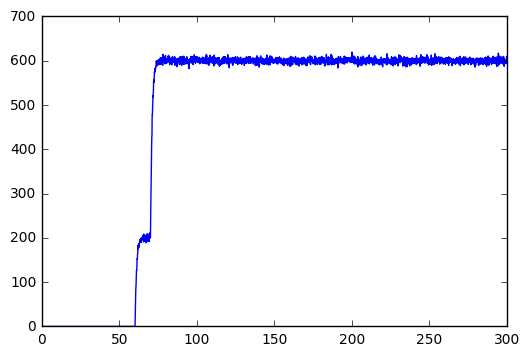

In [6]:
yout = good_start(T)
plt.plot(T,yout)

Sometimes the engine does not start. Out of fuel. Spark plugs unhooked.

Make a no-start plot.

In [7]:
np.random.uniform(-5, 5) 

1.9403672180483644

In [8]:
def no_start(T):
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>60)]=crank_speed
    U[(T>70)]=0
    yout, T, xout = lsim(sys1, U=U, T=T)
    return yout

(0, 700)

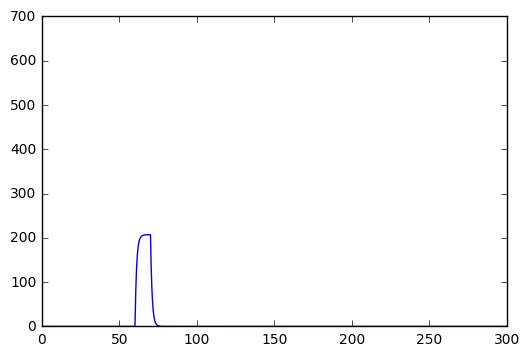

In [17]:
fig = plt.figure()
yout = no_start(T)
plt.plot(T,yout)
plt.ylim([0, 700])

Increase randomness so that the neural network isn't overfitted.

In [14]:
crank_speed = np.random.uniform(200,210)
idle_speed  = np.random.uniform(595, 605)

crank_time = np.random.uniform(10,60)
crank_duration = np.random.uniform(5, 15)

In [18]:
def good_start(T):
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    U[(T>crank_time+crank_duration)]=idle_speed

    yout, T, xout = lsim(sys1, U=U, T=T)
    N = np.random.normal(0, 5, yout.shape)
    yout[U>0]+=N[U>0]
    return yout

def no_start(T):
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    U[(T>crank_time+crank_duration)]=0
    yout, T, xout = lsim(sys1, U=U, T=T)
    return yout

In [26]:
def gen_start(T):
    crank_speed = np.random.uniform(200,210)
    idle_speed  = np.random.uniform(595, 605)

    crank_time = np.random.uniform(10,60)
    crank_duration = np.random.uniform(5, 15)
    
    # Simulate a good start.
    U = np.zeros(T.shape)
    U[(T>crank_time)]=crank_speed
    if crank_duration>12:
        U[(T>crank_time+crank_duration)]=0
        start_type = "no"
    else:
        U[(T>crank_time+crank_duration)]=idle_speed
        start_type = "good"
    
    yout, T, xout = lsim(sys1, U=U, T=T)
    
    N = np.random.normal(0, 5, yout.shape)
    yout[U>0]+=N[U>0]
        
    return yout, start_type

(0, 700)

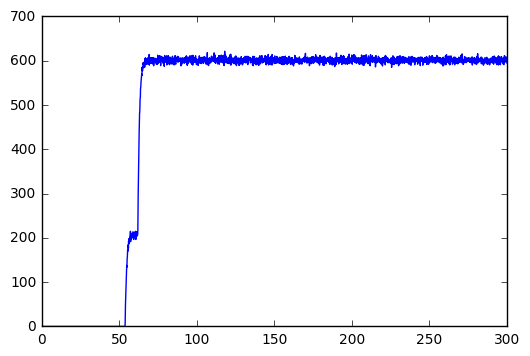

In [27]:
fig = plt.figure()
yout, start_type = gen_start(T)
plt.plot(T,yout)
plt.ylim([0, 700])

In [31]:
import uuid
U = uuid.uuid4()

In [34]:
import os
folder = str(U)+".png"

In [ ]:
base_dir = os.path.join("Images", start_type)
if os.path.exists(base_dir):
    os.makedirs(base_dir)

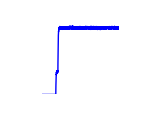

In [29]:

fig = plt.figure(figsize=(1,1), dpi=32)
plt.plot(T,yout)
plt.axis('off')
plt.savefig()